In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [34]:
from ipywidgets import interact
import ipywidgets as widgets

# Read in Whole Foods CSV

In [3]:
whole_foods = pd.read_csv('wfm.csv')

In [4]:
whole_foods.head()

,﻿Date,Open,High,Low,Close,Volume
0,7-Jun-16,34.83,35.53,34.80,35.17,4995649
1,6-Jun-16,34.77,35.27,34.62,34.91,7581654
2,3-Jun-16,34.28,34.32,33.66,34.07,3809944
3,2-Jun-16,33.97,34.35,33.67,34.32,4562770
4,1-Jun-16,33.20,34.14,33.16,33.94,11568054


In [9]:
whole_foods.Open = pd.to_numeric(whole_foods.Open, errors='coerce')

whole_foods.dtypes

﻿Date      object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [12]:
whole_foods['Difference'] = whole_foods.Open - whole_foods.Close # Create difference between open and close

In [13]:
whole_foods.describe()

,Open,High,Low,Close,Volume,Difference
count,1255.000000,1256.000000,1256.000000,1256.000000,1.256000e+03,1255.000000
mean,42.861633,43.326967,42.412213,42.883893,4.432186e+06,-0.014064
std,8.896023,8.914427,8.861323,8.880439,3.387151e+06,0.590853
min,27.060000,27.440000,26.660000,26.990000,8.252500e+05,-3.030000
25%,34.315000,34.675000,33.927500,34.347500,2.576586e+06,-0.360000
50%,42.560000,42.930000,42.200000,42.570000,3.646040e+06,0.010000
75%,49.865000,50.250000,49.265000,49.827500,4.993293e+06,0.350000
max,64.950000,65.590000,64.750000,65.240000,4.913101e+07,2.420000


In [21]:
# 'Date' column giving issues, changed up the columns
whole_foods.columns = ['date', 'open', 'high','low','close','volume', 'difference']

In [24]:
# Convert date to date time
whole_foods.date = pd.to_datetime(whole_foods.date) 

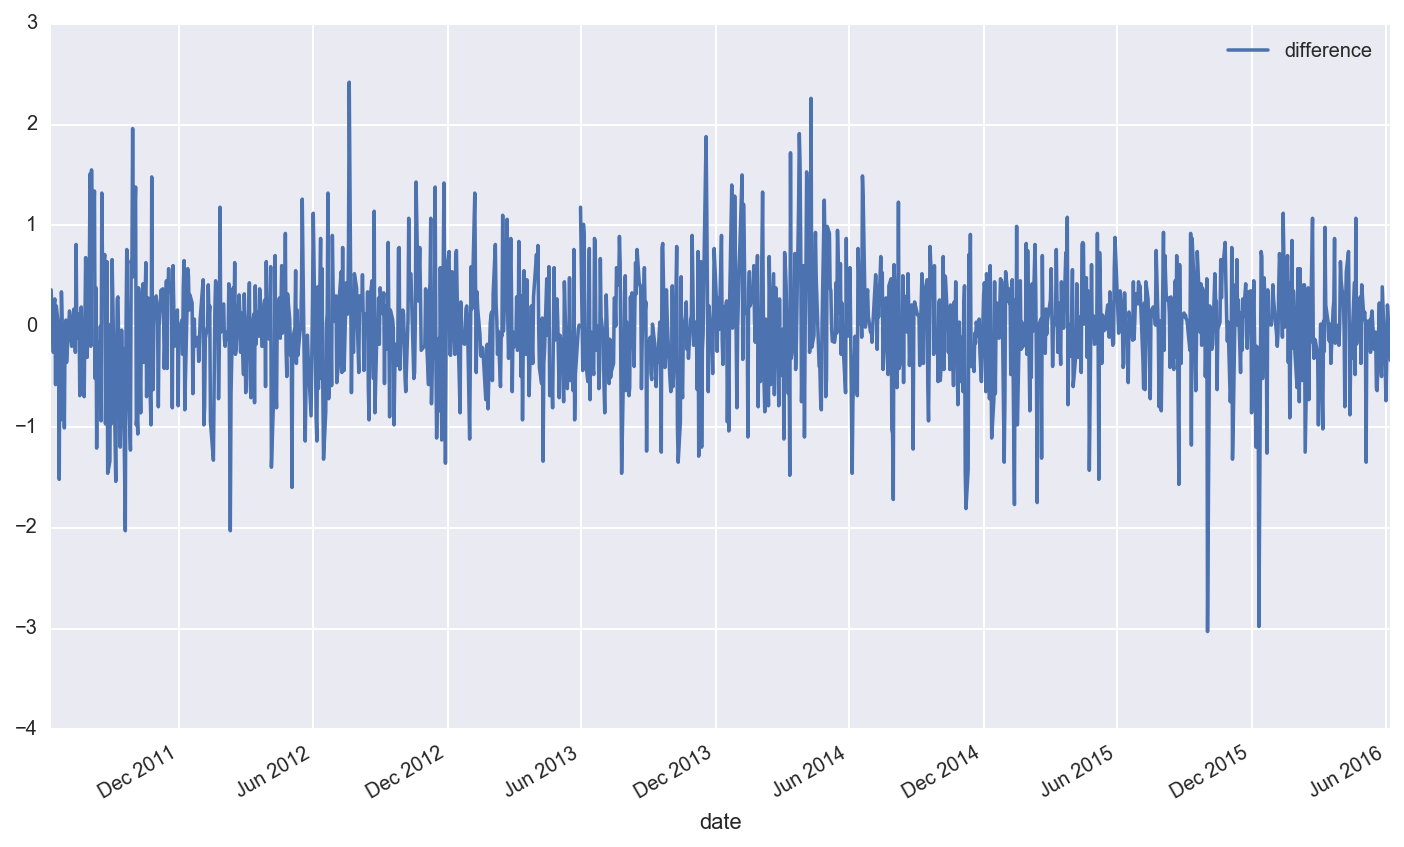

In [28]:

whole_foods.plot(figsize=(12,7), x='date', y='difference')

In [50]:
# Reindex to datetime
whole_foods.index = pd.to_datetime(whole_foods.date) 

In [51]:
def plot_mean_estimator(sd, resample='D', window=4, orig_resample='D',
                        meantype='rolling'):
    
    plt.figure(figsize=(18,7))
        
    orig_quant = sd.difference.resample(orig_resample).mean()
    orig_dates = orig_quant.index.to_pydatetime()
    
    plt.plot(orig_dates, orig_quant, lw=2, c='black', ls='dashed', alpha=0.35, label='original')
    
    if meantype == 'rolling':
        est_quant = sd.difference.resample(resample).mean().rolling(window=window).mean()
    elif meantype == 'expweight':
        est_quant = sd.difference.resample(resample).mean().ewm(span=window).mean()
        
    est_dates = est_quant.index.to_pydatetime()
    
    plt.plot(est_dates, est_quant, lw=3.5, label='mean estimate')

    plt.tick_params(labelsize=14)
    plt.legend(loc='upper left')

    plt.show()

In [52]:
def estmean_wrapper(timemin=0, timemax=50, resample='D', window=2, meantype='rolling',
                    ):
    
    sd = whole_foods.iloc[timemin:timemax, :].copy()
    
    plot_mean_estimator(sd, resample=resample, window=window, 
                        orig_resample=resample, meantype=meantype)
    

timeminw = widgets.IntSlider(min=0, max=whole_foods.shape[0]-2, step=1, value=0, continuous_update=False)
timemaxw = widgets.IntSlider(min=1, max=whole_foods.shape[0]-1, step=1, value=whole_foods.shape[0]-1, continuous_update=False)
windower = widgets.IntSlider(min=1, max=10, step=1, value=2, continuous_update=False)
resample_opts = {'days':'D', 'weeks':'W', 'months':'M'}
meantype_opts = {'rolling mean':'rolling', 'exponentially weighted':'expweight'}
noiser = widgets.FloatSlider(min=0, max=10, step=0.25, value=0, continuous_update=False)

def update_timemax(*args):
    timemaxw.min = timeminw.value + 1
    
timeminw.observe(update_timemax, 'value')


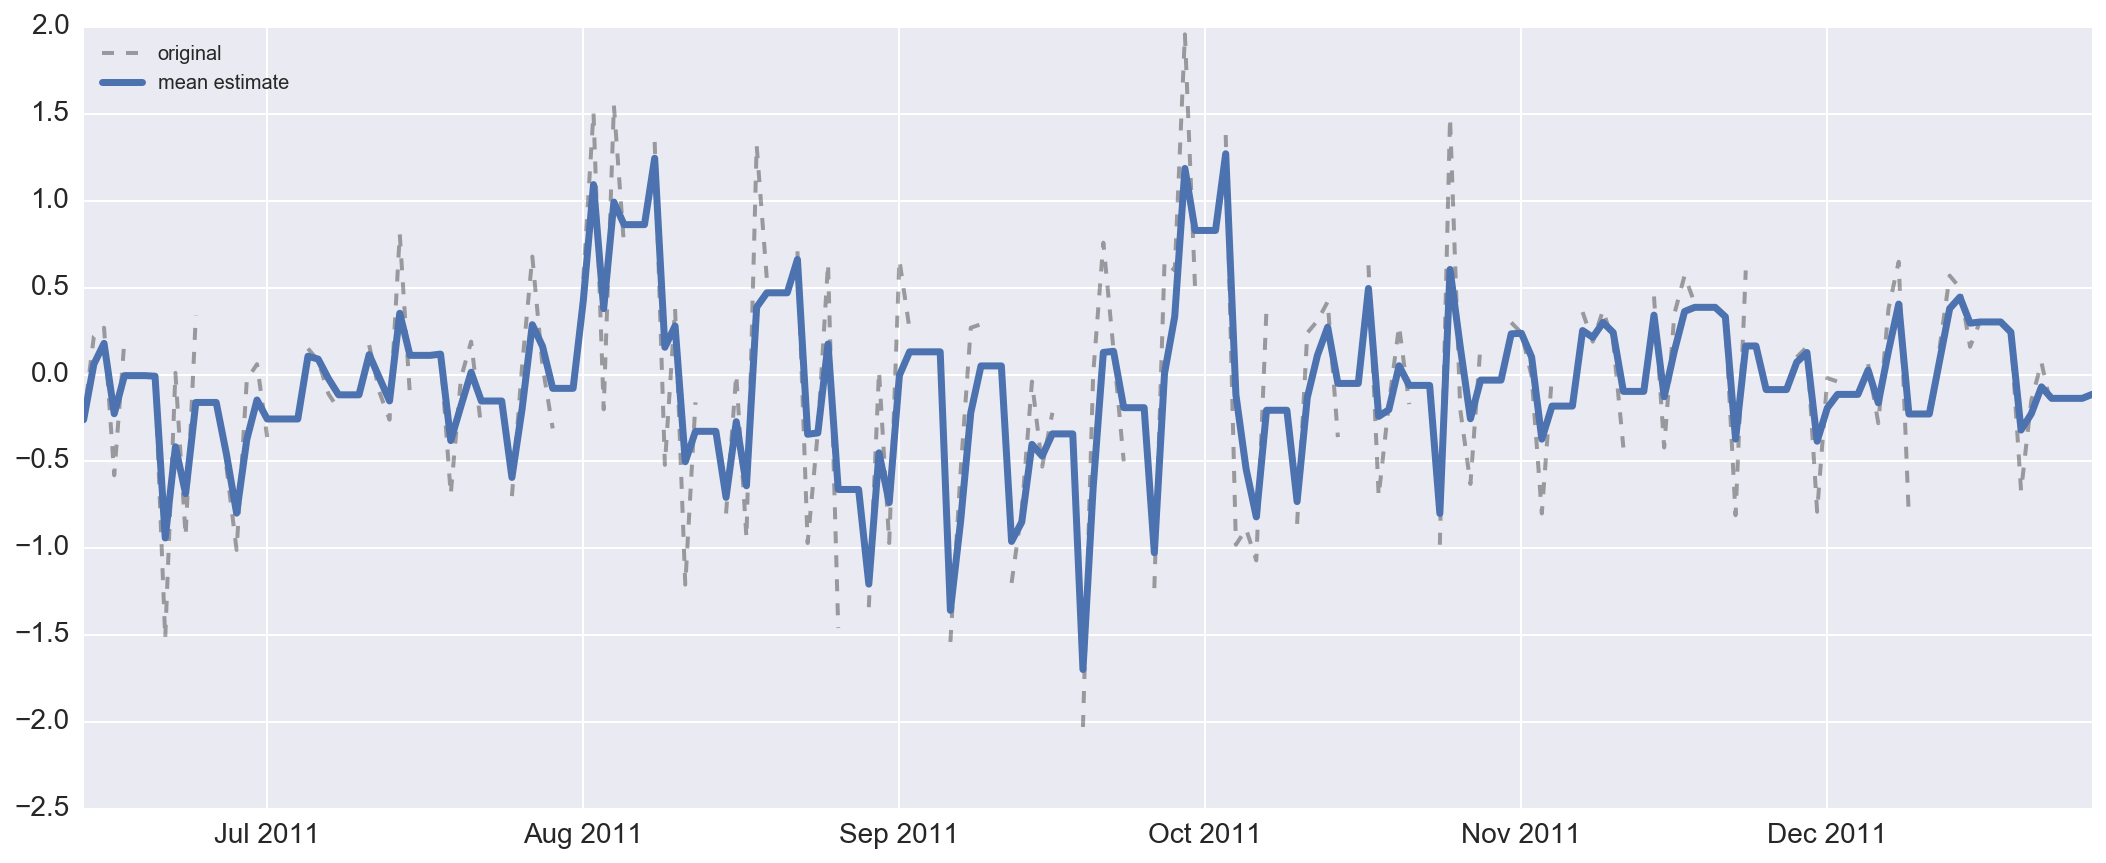

In [53]:
interact(estmean_wrapper,
         meantype=meantype_opts,
         resample=resample_opts,
         window=windower,
         timemin=timeminw, 
         timemax=timemaxw)